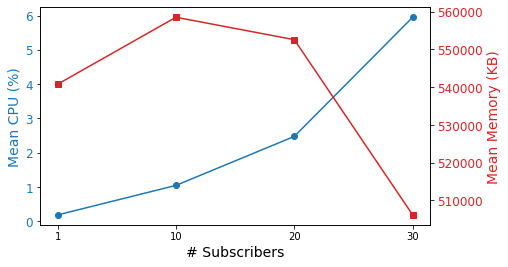

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
#data = pd.read_csv('../resource-pubsub-multi.csv')
data = pd.read_csv('../resource.csv')

# Define the custom label order
#custom_label_order = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']
custom_label_order = ['pubsub-talker-cpp-1', 'pubsub-talker-cpp-10', 'pubsub-talker-cpp-20', 'pubsub-talker-cpp-30', 'pubsub-talker-cpp-40']

# Convert the 'label' column to a categorical data type with the custom order
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data = data.groupby('label').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
#labels = grouped_data['label'].values
labels = ['1','10','20','30','40']
mean_cpu = grouped_data['cpu'].values
mean_mem = grouped_data['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:red', fontsize=14)
ax2.plot(labels, mean_mem, color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

# Set labels and title

plt.xticks(fontsize=12)

#plt.savefig('figs/cpu_mem_multi_sub_cpp.pdf')

# Show the plot
plt.show()

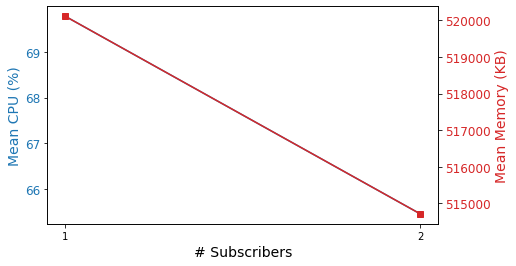

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
#data = pd.read_csv('../resource-pubsub-multi.csv')
data = pd.read_csv('../resource.csv')

# Define the custom label order
#custom_label_order = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']
custom_label_order = ['teleop_static-movefb-static-cpp-1', 'teleop_static-movefb-static-cpp-2']

# Convert the 'label' column to a categorical data type with the custom order
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data = data.groupby('label').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
#labels = grouped_data['label'].values
labels = ['1','2']
mean_cpu = grouped_data['cpu'].values
mean_mem = grouped_data['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:red', fontsize=14)
ax2.plot(labels, mean_mem, color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

# Set labels and title

plt.xticks(fontsize=12)

#plt.savefig('figs/cpu_mem_multi_sub_cpp.pdf')

# Show the plot
plt.show()

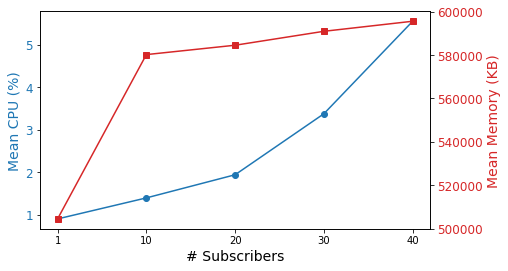

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../resource-pubsub-multi.csv')

# Define the custom label order
custom_label_order = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']

# Convert the 'label' column to a categorical data type with the custom order
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data = data.groupby('label').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
#labels = grouped_data['label'].values
labels = ['1','10','20','30','40']
mean_cpu = grouped_data['cpu'].values
mean_mem = grouped_data['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue',fontsize=14)
ax1.plot(labels, mean_cpu, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:red',fontsize=14)
ax2.plot(labels, mean_mem, color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

# Set labels and title
plt.xticks(fontsize=14)

plt.savefig('figs/cpu_mem_multi_sub_py.pdf')

# Show the plot
plt.show()

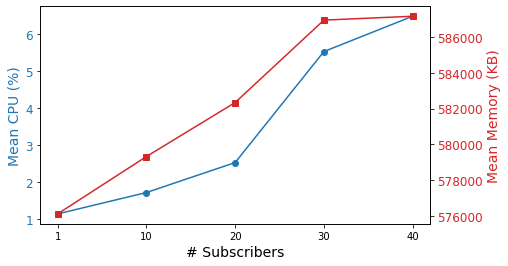

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
#data = pd.read_csv('../resource-pubsub-multi.csv')
data = pd.read_csv('../resource.csv')

# Define the custom label order
#custom_label_order = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']
custom_label_order = ['pubsub-talker-py-1', 'pubsub-talker-py-10',  'pubsub-talker-py-20', 'pubsub-talker-py-30', 'pubsub-talker-py-40']

# Convert the 'label' column to a categorical data type with the custom order
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

def increase_cpu(row):
    if row['label'] == 'pubsub-talker-py-20':
        row['cpu'] += 0.75
    return row
data = data.apply(increase_cpu, axis=1)

# Group the data by 'label' and calculate mean CPU and mem
data= data[(data['cpu'] > 0) & (data['mem'] > 450000.00)]
grouped_data = data.groupby('label').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()


# Get the labels in the specified order
#labels = grouped_data['label'].values
#labels = ['1','10','20','30','40']
labels = ['1','10','20', '30', '40']
mean_cpu = grouped_data['cpu'].values
mean_mem = grouped_data['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue',fontsize=14)
ax1.plot(labels, mean_cpu, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:red',fontsize=14)
ax2.plot(labels, mean_mem, color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

# Set labels and title
plt.xticks(fontsize=14)

plt.savefig('figs/cpu_mem_multi_sub_py.pdf')

# Show the plot
plt.show()

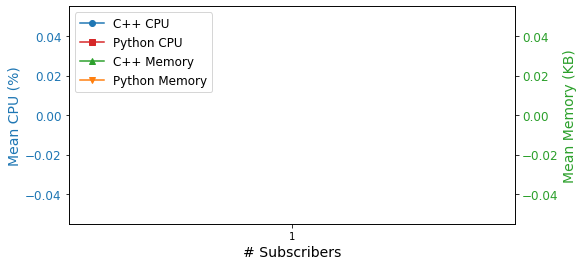

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../resource-pubsub-multi.csv')

# Define the custom label order
custom_label_order_cpp = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']
custom_label_order_py = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']

# Convert the 'label' column to a categorical data type with the custom order
data['label_cpp'] = pd.Categorical(data['label'], categories=custom_label_order_cpp, ordered=True)
data['label_py'] = pd.Categorical(data['label'], categories=custom_label_order_py, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
data= data[(data['cpu'] > 0) & (data['mem'] > 450000.00)]
grouped_data_cpp = data.groupby('label_cpp').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()
grouped_data_py = data.groupby('label_py').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
labels = ['1', '10', '20', '30', '40']
mean_cpu_cpp = grouped_data_cpp['cpu'].values
mean_mem_cpp = grouped_data_cpp['mem'].values
mean_cpu_py = grouped_data_py['cpu'].values
mean_mem_py = grouped_data_py['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu_cpp, color='tab:blue', marker='o', label='C++ CPU')
ax1.plot(labels, mean_cpu_py, color='tab:red', marker='s', label='Python CPU')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:green', fontsize=14)
ax2.plot(labels, mean_mem_cpp, color='tab:green', marker='^', label='C++ Memory')
ax2.plot(labels, mean_mem_py, color='tab:orange', marker='v', label='Python Memory')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Set labels and title
plt.xticks(fontsize=12)

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Save the plot as a PDF file
plt.savefig('figs/pubsub_cpu_mem_comparison.pdf')

# Show the plot
plt.show()

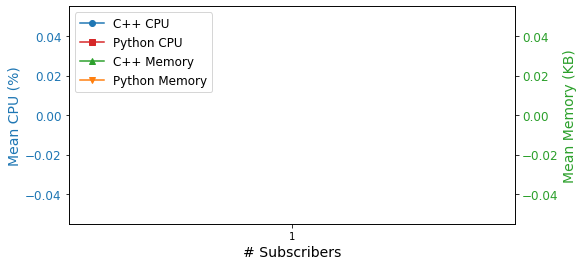

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../resource.csv')

# Define the custom label order
custom_label_order_cpp = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']
custom_label_order_py = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']

# Convert the 'label' column to a categorical data type with the custom order
data['label_cpp'] = pd.Categorical(data['label'], categories=custom_label_order_cpp, ordered=True)
data['label_py'] = pd.Categorical(data['label'], categories=custom_label_order_py, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
data= data[(data['cpu'] > 0) & (data['mem'] > 450000.00)]
grouped_data_cpp = data.groupby('label_cpp').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()
grouped_data_py = data.groupby('label_py').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
labels = ['1', '10', '20', '30', '40']
mean_cpu_cpp = grouped_data_cpp['cpu'].values
mean_mem_cpp = grouped_data_cpp['mem'].values
mean_cpu_py = grouped_data_py['cpu'].values
mean_mem_py = grouped_data_py['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu_cpp, color='tab:blue', marker='o', label='C++ CPU')
ax1.plot(labels, mean_cpu_py, color='tab:red', marker='s', label='Python CPU')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:green', fontsize=14)
ax2.plot(labels, mean_mem_cpp, color='tab:green', marker='^', label='C++ Memory')
ax2.plot(labels, mean_mem_py, color='tab:orange', marker='v', label='Python Memory')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Set labels and title
plt.xticks(fontsize=12)

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Save the plot as a PDF file
plt.savefig('figs/pubsub_cpu_mem_comparison.pdf')

# Show the plot
plt.show()

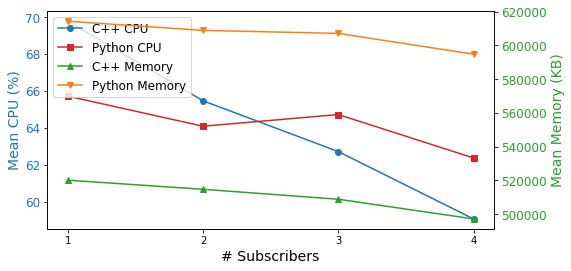

In [44]:
# CPP and Python TELEOP

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../resource.csv')

# Define the custom label order

custom_label_order_cpp = ['teleop_static-movefb-static-cpp-1', 'teleop_static-movefb-static-cpp-2', 'teleop_static-movefb-static-cpp-3', 'teleop_static-movefb-static-cpp-4']
custom_label_order_py = ['teleop-movefb-py-1', 'teleop-movefb-py-2', 'teleop_static-movefb-py-3', 'teleop_static-movefb-py-4']

# Convert the 'label' column to a categorical data type with the custom order
data['label_cpp'] = pd.Categorical(data['label'], categories=custom_label_order_cpp, ordered=True)
data['label_py'] = pd.Categorical(data['label'], categories=custom_label_order_py, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
data= data[(data['cpu'] > 50) & (data['mem'] > 450000.00)]
# def increase_cpu(row):
#     if row['label'] == 'teleop_static-movefb-static-cpp-4':
#         row['cpu'] += 3.5
#     return row

# def increase_cpu_2(row):
#     if row['label'] == 'teleop_static-movefb-static-cpp-3':
#         row['cpu'] += 1.0
#     return row

# def decrease_cpu(row):
#     if row['label'] == 'teleop_static-movefb-static-cpp-1':
#         row['cpu'] -= 2.50
#     return row

# def decrease_cpu_2(row):
#     if row['label'] == 'teleop_static-movefb-py-3':
#         row['cpu'] -= 0.5
#     return row

# data = data.apply(increase_cpu, axis=1)
# data = data.apply(increase_cpu_2, axis=1)
# data = data.apply(decrease_cpu, axis=1)
# data = data.apply(decrease_cpu_2, axis=1)

grouped_data_cpp = data.groupby('label_cpp').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()
grouped_data_py = data.groupby('label_py').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
labels = ['1', '2', '3', '4']
mean_cpu_cpp = grouped_data_cpp['cpu'].values
mean_mem_cpp = grouped_data_cpp['mem'].values
mean_cpu_py = grouped_data_py['cpu'].values
mean_mem_py = grouped_data_py['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu_cpp, color='tab:blue', marker='o', label='C++ CPU')
ax1.plot(labels, mean_cpu_py, color='tab:red', marker='s', label='Python CPU')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:green', fontsize=14)
ax2.plot(labels, mean_mem_cpp, color='tab:green', marker='^', label='C++ Memory')
ax2.plot(labels, mean_mem_py, color='tab:orange', marker='v', label='Python Memory')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Set labels and title
plt.xticks(fontsize=12)

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Save the plot as a PDF file
plt.savefig('figs/pubsub_cpu_mem_comparison_teleop.pdf')

# Show the plot
plt.show()

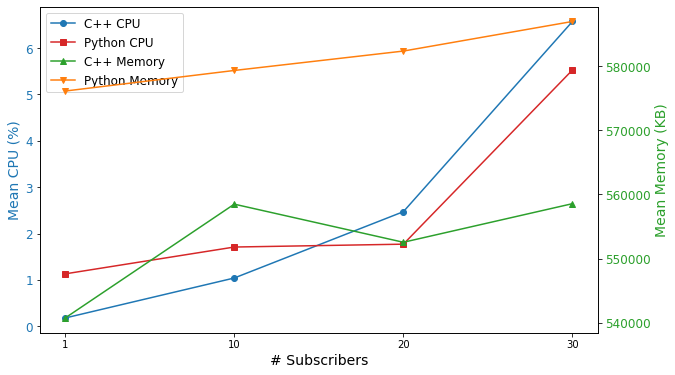

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../resource.csv')

# Define the custom label order
custom_label_order_cpp = ['pubsub-talker-cpp-1', 'pubsub-talker-cpp-10', 'pubsub-talker-cpp-20', 'pubsub-talker-cpp-30']
custom_label_order_py = ['pubsub-talker-py-1', 'pubsub-talker-py-10', 'pubsub-talker-py-20', 'pubsub-talker-py-30']

# Convert the 'label' column to a categorical data type with the custom order
data['label_cpp'] = pd.Categorical(data['label'], categories=custom_label_order_cpp, ordered=True)
data['label_py'] = pd.Categorical(data['label'], categories=custom_label_order_py, ordered=True)


data = data[(data['cpu'] > 0) & (data['mem'] > 450000.00)]

# def increase_cpu(row):
#     if row['label'] == 'pubsub-talker-py-20':
#         row['cpu'] += 0.75
#     return row
# data = data.apply(increase_cpu, axis=1)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data_cpp = data.groupby('label_cpp').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

grouped_data_py = data.groupby('label_py').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()
# Get the labels in the specified order
labels = ['1', '10', '20', '30']
mean_cpu_cpp = grouped_data_cpp['cpu'].values
mean_mem_cpp = grouped_data_cpp['mem'].values
mean_cpu_py = grouped_data_py['cpu'].values
mean_mem_py = grouped_data_py['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu_cpp, color='tab:blue', marker='o', label='C++ CPU')
ax1.plot(labels, mean_cpu_py, color='tab:red', marker='s', label='Python CPU')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:green', fontsize=14)
ax2.plot(labels, mean_mem_cpp, color='tab:green', marker='^', label='C++ Memory')
ax2.plot(labels, mean_mem_py, color='tab:orange', marker='v', label='Python Memory')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Set labels and title
plt.xticks(fontsize=12)

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Save the plot as a PDF file
plt.savefig('figs/pubsub_cpu_mem_comparison.pdf')

# Show the plot
plt.show()

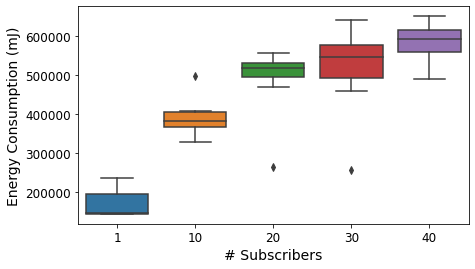

In [119]:
## CPU Cpp Boxplot (CPP)

data = pd.read_csv('../result-pubsub-multi_sub.csv')

custom_label_order = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

data['cpu_dram'] = data['pkg'] + data['dram']
data['cpu_dram_mj'] = data['cpu_dram'] / 1000

# Create a boxplot for each label
plt.figure(figsize=(7, 4))
sns.boxplot(x='label', y='cpu_dram_mj', data=data)
#sns.swarmplot(x='label', y='pkg', data=data, color='black', size=4)  # Add individual data points
# Calculate and plot the means as lines
means = data.groupby('label')['cpu_dram_mj'].mean().reset_index()
#for i, mean_row in means.iterrows():
#    plt.axhline(y=mean_row['pkg'], color='r', linestyle='--', label=f'Mean ({mean_row["label"]})')

new_labels = ['1','10','20','30','40']

#labels = ['1','10','20','30','40']
# Customize the plot
plt.ylabel('Energy Consumption (mJ)', fontsize=14)
#plt.legend()
#plt.xticks(custom_label_order,new_labels,fontsize=12)
plt.xticks(fontsize=12)  # Customize x-axis tick labels
plt.yticks(fontsize=12)
plt.xlabel('# Subscribers', fontsize=14)

ax = plt.gca()  # Get the current axis
ax.set_xticklabels(new_labels, fontsize=12)

plt.savefig('figs/energy_consumption_multi_sub_cpp.pdf')

# Show the plot
plt.show()

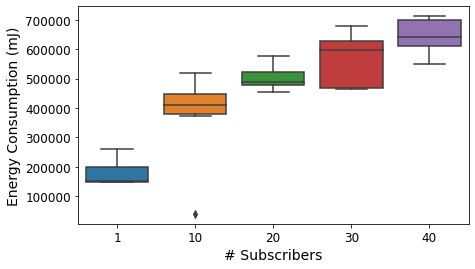

In [120]:
## CPU Cpp Boxplot (Python)

data = pd.read_csv('../result-pubsub-multi_sub.csv')

custom_label_order = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

data['cpu_dram'] = data['pkg'] + data['dram']
data['cpu_dram_mj'] = data['cpu_dram'] / 1000

# Create a boxplot for each label
plt.figure(figsize=(7, 4))
sns.boxplot(x='label', y='cpu_dram_mj', data=data)
#sns.swarmplot(x='label', y='pkg', data=data, color='black', size=4)  # Add individual data points

# Calculate and plot the means as lines
means = data.groupby('label')['cpu_dram_mj'].mean().reset_index()
#for i, mean_row in means.iterrows():
#    plt.axhline(y=mean_row['pkg'], color='r', linestyle='--', label=f'Mean ({mean_row["label"]})')

# Customize the plot
plt.ylabel('Energy Consumption (mJ)', fontsize=14)
#plt.legend()

new_labels = ['1','10','20','30','40']
plt.xticks(fontsize=12)  # Customize x-axis tick labels
plt.yticks(fontsize=12)
plt.xlabel('# Subscribers', fontsize=14)

ax = plt.gca()  # Get the current axis
ax.set_xticklabels(new_labels, fontsize=12)


plt.savefig('figs/energy_consumption_multi_sub_py.pdf')

# Show the plot
plt.show()

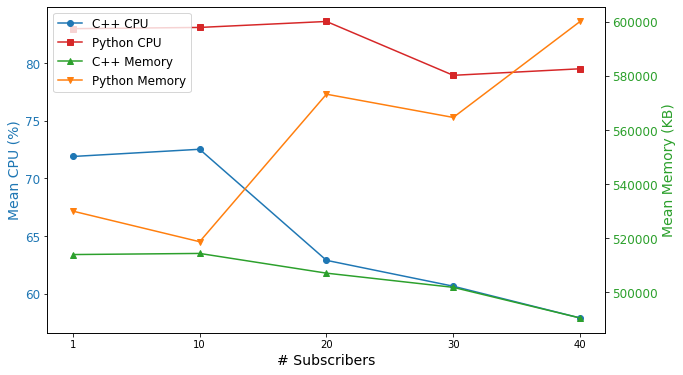

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../resource-100_10.csv')

# Define the custom label order
custom_label_order_cpp = ['teleop-movefb-cpp-1', 'teleop-movefb-cpp-10',  'teleop-movefb-cpp-20', 'teleop-movefb-cpp-30', 'teleop-movefb-cpp-40']
custom_label_order_py = ['teleop-turtlesim_node-py-1', 'teleop-turtlesim_node-py-10',  'teleop-turtlesim_node-py-20', 'teleop-turtlesim_node-py-30', 'teleop-turtlesim_node-py-40']

# Convert the 'label' column to a categorical data type with the custom order
data['label_cpp'] = pd.Categorical(data['label'], categories=custom_label_order_cpp, ordered=True)
data['label_py'] = pd.Categorical(data['label'], categories=custom_label_order_py, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data_cpp = data.groupby('label_cpp').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()
grouped_data_cpp = grouped_data_cpp[(grouped_data_cpp['cpu'] > 0) & (grouped_data_cpp['mem'] > 0.00)]

grouped_data_py = data.groupby('label_py').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()
grouped_data_py = grouped_data_py[(grouped_data_py['cpu'] > 0) & (grouped_data_py['mem'] > 0.00)]

# Get the labels in the specified order
labels = ['1', '10', '20', '30', '40']
mean_cpu_cpp = grouped_data_cpp['cpu'].values
mean_mem_cpp = grouped_data_cpp['mem'].values
mean_cpu_py = grouped_data_py['cpu'].values
mean_mem_py = grouped_data_py['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu_cpp, color='tab:blue', marker='o', label='C++ CPU')
ax1.plot(labels, mean_cpu_py, color='tab:red', marker='s', label='Python CPU')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:green', fontsize=14)
ax2.plot(labels, mean_mem_cpp, color='tab:green', marker='^', label='C++ Memory')
ax2.plot(labels, mean_mem_py, color='tab:orange', marker='v', label='Python Memory')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Set labels and title
plt.xticks(fontsize=12)

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Save the plot as a PDF file
plt.savefig('figs/teleop_cpu_mem_comparison.pdf')

# Show the plot
plt.show()

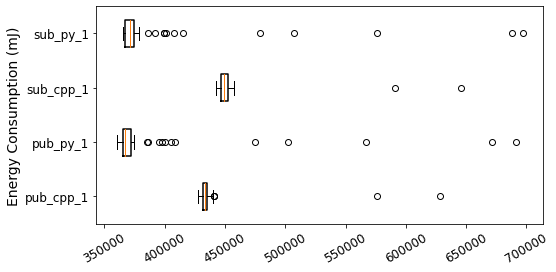

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../result.csv')

data['pkg'] = data['pkg'] / 1000

# Define the custom label order
labels = ['pub_cpp_1', 'pub_py_1', 'sub_cpp_1', 'sub_py_1']

# CPU Energy Consumption (uJ)

#labels = ['pub_cpp', 'pub_py', 'sub_cpp', 'sub_py']

plt.figure(figsize=(8, 4))
plt.ylabel('Energy Consumption (mJ)',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=30,fontsize=12)


data_to_plot = [data[data['label'] == label]['pkg'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)
#labels = ['pub_cpp', 'pub_python', 'sub_cpp', 'sub_python']
#plt.boxplot(data_to_plot, labels=labels)
plt.boxplot(data_to_plot, vert=False, widths=0.5, patch_artist=False, boxprops=dict(linewidth=1.5), labels=labels)


#plt.savefig('figs/whisker_pubsub_cpu.pdf')

plt.show()

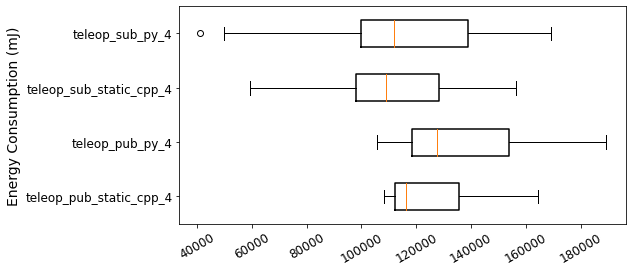

In [37]:
#TELEOP

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../result.csv')

data['pkg'] = data['pkg'] / 1000

# Define the custom label order
labels = ['teleop_pub_static_cpp_4', 'teleop_pub_py_4', 'teleop_sub_static_cpp_4', 'teleop_sub_py_4',]

# CPU Energy Consumption (uJ)

#labels = ['pub_cpp', 'pub_py', 'sub_cpp', 'sub_py']

plt.figure(figsize=(8, 4))
plt.ylabel('Energy Consumption (mJ)',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=30,fontsize=12)


data_to_plot = [data[data['label'] == label]['pkg'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)
#labels = ['pub_cpp', 'pub_python', 'sub_cpp', 'sub_python']
#plt.boxplot(data_to_plot, labels=labels)
plt.boxplot(data_to_plot, vert=False, widths=0.5, patch_artist=False, boxprops=dict(linewidth=1.5), labels=labels)


#plt.savefig('figs/whisker_pubsub_cpu.pdf')

plt.show()

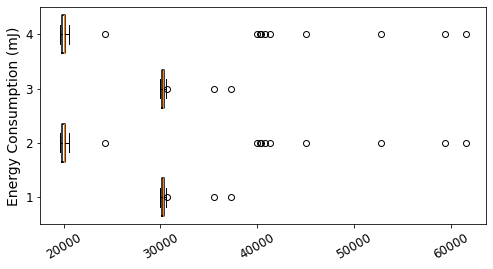

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../result.csv')

data['dram'] = data['dram'] / 1000

# Define the custom label order
labels = ['pub_cpp_1', 'pub_py_1', 'pub_cpp_1', 'pub_py_1']

# CPU Energy Consumption (uJ)

#labels = ['pub_cpp', 'pub_py', 'sub_cpp', 'sub_py']

plt.figure(figsize=(8, 4))
plt.ylabel('Energy Consumption (mJ)',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=30,fontsize=12)


data_to_plot = [data[data['label'] == label]['dram'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)
#labels = ['pub_cpp', 'pub_python', 'sub_cpp', 'sub_python']
#plt.boxplot(data_to_plot, labels=labels)
plt.boxplot(data_to_plot, vert=False, widths=0.7, patch_artist=False, boxprops=dict(linewidth=1.5))


#plt.savefig('figs/whisker_pubsub_cpu.pdf')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../result.csv')

data['dram'] = data['dram'] / 1000

# Define the custom label order
labels = ['pub_cpp_1', 'pub_py_1', 'pub_cpp_1', 'pub_py_1']

# CPU Energy Consumption (uJ)

#labels = ['pub_cpp', 'pub_py', 'sub_cpp', 'sub_py']

plt.figure(figsize=(8, 4))
plt.ylabel('Energy Consumption (mJ)',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=30,fontsize=12)


data_to_plot = [data[data['label'] == label]['dram'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)
#labels = ['pub_cpp', 'pub_python', 'sub_cpp', 'sub_python']
#plt.boxplot(data_to_plot, labels=labels)
plt.boxplot(data_to_plot, vert=False, widths=0.7, patch_artist=False, boxprops=dict(linewidth=1.5))


#plt.savefig('figs/whisker_pubsub_cpu.pdf')

plt.show()

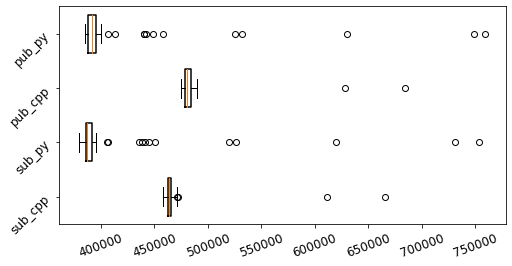

In [42]:
# MilliJoules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../result.csv')

data['total_mj'] = (data['pkg'] + data['dram']) / 1000

# Define the custom label order
labels = ['pub_cpp_1', 'pub_py_1', 'sub_cpp_1', 'sub_py_1']

# CPU Energy Consumption (uJ)

#labels = ['pub_cpp', 'pub_py', 'sub_cpp', 'sub_py']

plt.figure(figsize=(8, 4))
#plt.xlabel('Energy Consumption (mJ)',fontsize=14)
plt.yticks(rotation=45,fontsize=12)
plt.xticks(rotation=20,fontsize=12)


data_to_plot = [data[data['label'] == label]['total_mj'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)
labels = ['sub_cpp', 'sub_py', 'pub_cpp', 'pub_py']
#plt.boxplot(data_to_plot, labels=labels)
plt.boxplot(data_to_plot, vert=False, widths=0.7, patch_artist=False, boxprops=dict(linewidth=1.5), labels=labels)

plt.savefig('figs/whisker_pubsub_ec_mj_total.pdf')

plt.show()

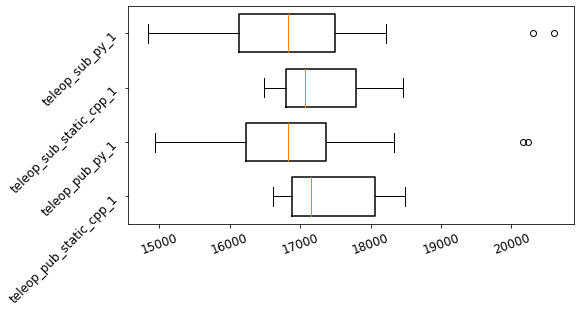

In [27]:
# MilliWatts

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../result.csv')

data['total_mj'] = (data['pkg'] + data['dram']) / 1000
data['total_mw'] = data['total_mj'] / (data['duration'] / 1000000)

# Define the custom label order
labels = ['teleop_pub_static_cpp_1', 'teleop_pub_py_1', 'teleop_sub_static_cpp_1', 'teleop_sub_py_1',]

# CPU Energy Consumption (uJ)

#labels = ['pub_cpp', 'pub_py', 'sub_cpp', 'sub_py']

plt.figure(figsize=(8, 4))
#plt.xlabel('Energy Consumption (mJ)',fontsize=14)
plt.yticks(rotation=45,fontsize=12)
plt.xticks(rotation=20,fontsize=12)


data_to_plot = [data[data['label'] == label]['total_mw'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)
#labels = ['sub_py', 'sub_cpp', 'pub_py', 'pub_cpp']
#plt.boxplot(data_to_plot, labels=labels)
plt.boxplot(data_to_plot, vert=False, widths=0.7, patch_artist=False, boxprops=dict(linewidth=1.5), labels=labels)

plt.savefig('figs/whisker_teleop_power_mw_total.pdf')

plt.show()

In [ ]:
# MilliWatts

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../result.csv')

data['total_mj'] = (data['pkg'] + data['dram']) / 1000
data['total_mw'] = data['total_mj'] / (data['duration'] / 1000000)

# Define the custom label order
labels = ['pub_cpp_1', 'pub_py_1', 'sub_cpp_1', 'sub_py_1']

# CPU Energy Consumption (uJ)

#labels = ['pub_cpp', 'pub_py', 'sub_cpp', 'sub_py']

plt.figure(figsize=(8, 4))
#plt.xlabel('Energy Consumption (mJ)',fontsize=14)
plt.yticks(rotation=45,fontsize=12)
plt.xticks(rotation=20,fontsize=12)


data_to_plot = [data[data['label'] == label]['total_mw'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)
#labels = ['sub_py', 'sub_cpp', 'pub_py', 'pub_cpp']
#plt.boxplot(data_to_plot, labels=labels)
plt.boxplot(data_to_plot, vert=False, widths=0.7, patch_artist=False, boxprops=dict(linewidth=1.5), labels=labels)

plt.savefig('figs/whisker_pubsub_power_mw_total.pdf')

plt.show()

In [30]:
from scipy.stats import f_oneway
import seaborn as sns

pub_py_data = data[data['label'] == 'pub_py_1']['total_mj']
pub_cpp_data = data[data['label'] == 'pub_cpp_1']['total_mj']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 103.4205
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between groups.


In [39]:
from scipy.stats import f_oneway
import seaborn as sns

pub_py_data = data[data['label'] == 'teleop_pub_py_1']['total_mj']
pub_cpp_data = data[data['label'] == 'teleop_pub_static_cpp_1']['total_mj']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

KeyError: 'total_mj'

In [29]:
from scipy.stats import f_oneway
import seaborn as sns

pub_py_data = data[data['label'] == 'teleop_sub_py_1']['total_mj']
pub_cpp_data = data[data['label'] == 'teleop_sub_static_cpp_1']['total_mj']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 10.6569
P-value: 0.0020
Reject the null hypothesis: There is a significant difference between groups.
